In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np
import geopandas as gpd

In [2]:
df = pd.read_csv('C:/Users/Michael/Documents/ml_zc/datosObtenidos/geoespaciales.csv')
nbi = pd.read_excel('C:/Users/Michael/Documents/ml_zc/datosObtenidos/NBI_parroquia.xlsx', sheet_name='data', dtype={'ADM3_PCODE': str})
suiza = pd.read_csv('C:/Users/Michael/Documents/ml_zc/datosObtenidos/suiza.csv')

In [3]:
# Homologar códigos
df['ADM3_PCODE'] = df['ADM3_PCODE'].str.replace('EC', '', regex=False)
df22 = df[df['Año']==2022]
consolidada = pd.merge(df22, nbi, how='left', on=['ADM3_PCODE'])

In [4]:
consolidada

,ADM3_PCODE,Año,avg_rad_max,pop,m2,edificaciones,carreteras,densidad,numero_componentes,densidad_servicios,...,educativos,avg_ndvi,area,dist_luz,Provincia,Cantón,Parroquia,Personas,No pobres,Pobres
0,010150,2022,66.805288,378564,5.978417e+07,5319.0,14275.0,0.000054,197.0,0.015504,...,173.0,0.276570,7.148434e+07,1.983480e+04,Azuay,Cuenca,Cuenca,360524,324820,35704
1,010151,2022,2.126417,22812,2.371199e+06,345.0,581.0,0.000195,53.0,0.017241,...,7.0,0.494996,2.514428e+08,6.406692e+03,Azuay,Cuenca,Baños,21783,15591,6192
2,010152,2022,3.060251,6749,0.000000e+00,17.0,233.0,0.000354,14.0,0.000000,...,1.0,0.565185,7.508753e+07,0.000000e+00,Azuay,Cuenca,Cumbe,6455,2832,3623
3,010153,2022,0.678795,1801,0.000000e+00,0.0,100.0,0.000230,12.0,0.000000,...,0.0,0.470111,3.800021e+08,NaN,Azuay,Cuenca,Chaucha,1720,540,1180
4,010154,2022,1.252252,3349,9.911728e+05,8.0,147.0,0.000503,3.0,0.068783,...,1.0,0.465710,1.108470e+08,4.632720e+05,Azuay,Cuenca,Checa,3184,2157,1027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,240350,2022,27.945984,36598,1.399157e+07,132.0,793.0,0.000949,6.0,0.111111,...,8.0,NaN,1.712493e+07,8.093841e+05,Santa Elena,Salinas,Salinas,35048,22347,12701
1037,240351,2022,9.731164,15703,1.441084e+06,0.0,259.0,0.001385,5.0,0.064516,...,6.0,NaN,1.498181e+07,inf,Santa Elena,Salinas,Anconcito,15047,7184,7863
1038,240352,2022,14.754003,38386,9.579241e+06,25.0,818.0,0.000535,20.0,0.036364,...,3.0,NaN,3.569570e+07,1.472747e+06,Santa Elena,Salinas,José Luis Tamayo,36660,19498,17162
1039,010951,2022,0.948494,1711,0.000000e+00,0.0,64.0,0.000752,3.0,0.000000,...,0.0,0.487555,1.257345e+08,NaN,Azuay,Sígsig,Cuchil,1638,974,664


In [5]:
# Calculamos el % nbi
consolidada = consolidada.copy()
consolidada['nbi'] = consolidada['Pobres']/consolidada['Personas']

# Calculamos área urbana ocupada
consolidada['area_urb_ocupada'] = consolidada['m2']/consolidada['area']

# Ajustemos los VIIR de cm^2 a m^2 y relativizamos la actividad lumínica con Suiza
consolidada['viirs_m2'] = consolidada['avg_rad_max']*1e4
max_suiza = max(suiza['avg_rad_max'])
consolidada['act_lum'] = consolidada['avg_rad_max']/max_suiza

In [6]:
# Necesito restringir mi análisis a datos que existan
consolidada = consolidada[(consolidada['m2'] > 0) & (consolidada['edificaciones'] > 0) & (consolidada['educativos'] > 0)]

# Descriptivos

In [7]:
consolidada[['nbi', 'act_lum', 'pop', 'area_urb_ocupada', 'carreteras', 'edificaciones', 'densidad', 'numero_componentes', 'densidad_servicios', 
             'numero_componentes_servicios', 'num_red_agua', 'educativos', 'avg_ndvi']].describe()

,nbi,act_lum,pop,area_urb_ocupada,carreteras,edificaciones,densidad,numero_componentes,densidad_servicios,numero_componentes_servicios,num_red_agua,educativos,avg_ndvi
count,375.000000,375.000000,3.750000e+02,375.000000,375.000000,375.00000,375.000000,375.000000,375.000000,375.000000,375.0,375.000000,249.000000
mean,0.500211,0.075014,3.994152e+04,0.099187,974.778667,1425.94400,0.000936,24.098667,0.048547,0.888000,0.0,15.037333,0.405062
std,0.228657,0.101742,1.788378e+05,0.185046,4032.216135,5343.86037,0.006459,73.311790,0.157444,2.291169,0.0,40.044009,0.124246
min,0.094918,0.006526,3.310000e+02,0.000011,4.000000,1.00000,0.000010,1.000000,0.000000,0.000000,0.0,1.000000,0.081539
25%,0.313204,0.017626,5.223000e+03,0.005705,182.500000,16.00000,0.000211,6.000000,0.000000,0.000000,0.0,2.000000,0.324985
50%,0.462112,0.033400,1.083400e+04,0.018486,349.000000,84.00000,0.000406,12.000000,0.000000,0.000000,0.0,6.000000,0.404459
75%,0.673438,0.096442,2.502800e+04,0.090918,730.000000,672.00000,0.000726,21.000000,0.018573,1.000000,0.0,14.000000,0.495597
max,0.988633,0.866839,2.792588e+06,0.994587,68586.000000,51099.00000,0.125000,1257.000000,1.000000,23.000000,0.0,519.000000,0.695936


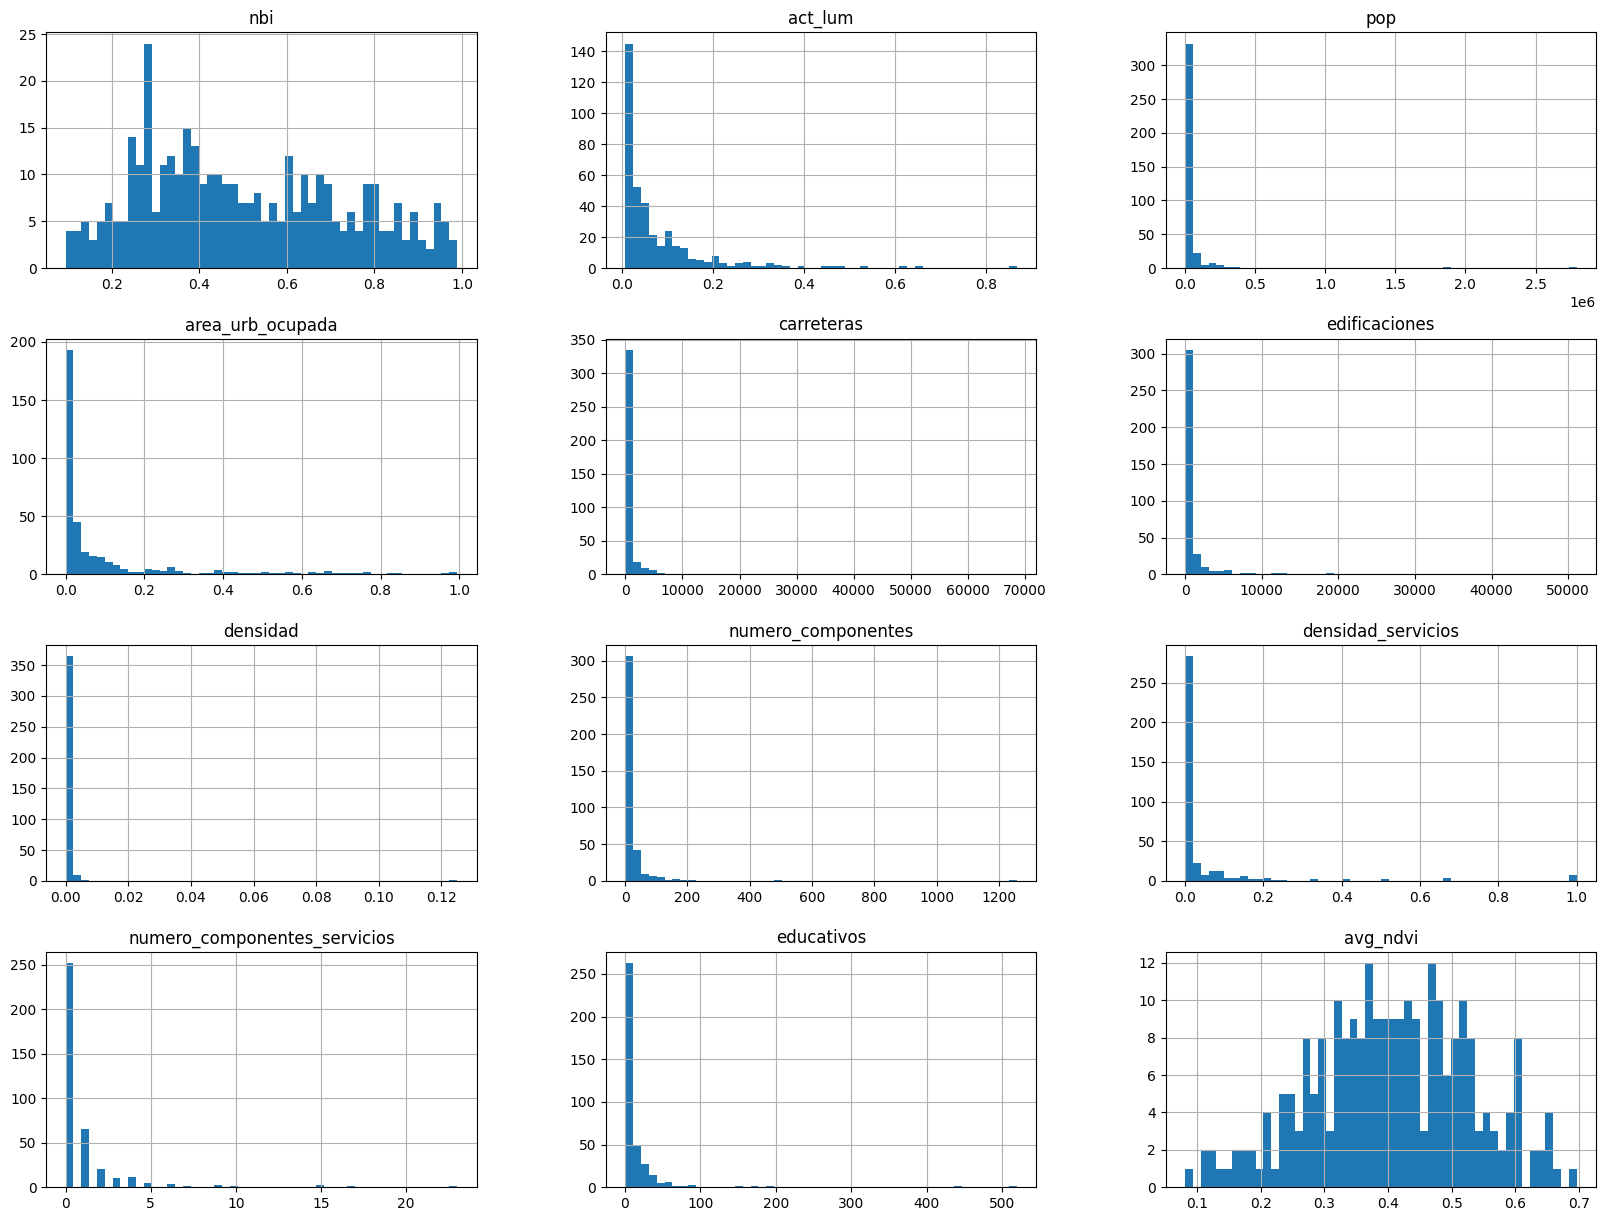

In [8]:
# Mostrar distribuciones
consolidada[['nbi', 'act_lum', 'pop', 'area_urb_ocupada', 'carreteras', 'edificaciones', 'densidad', 'numero_componentes', 
             'densidad_servicios', 'numero_componentes_servicios', 'educativos', 'avg_ndvi']].hist(bins=50, figsize=(20, 15))
plt.show()

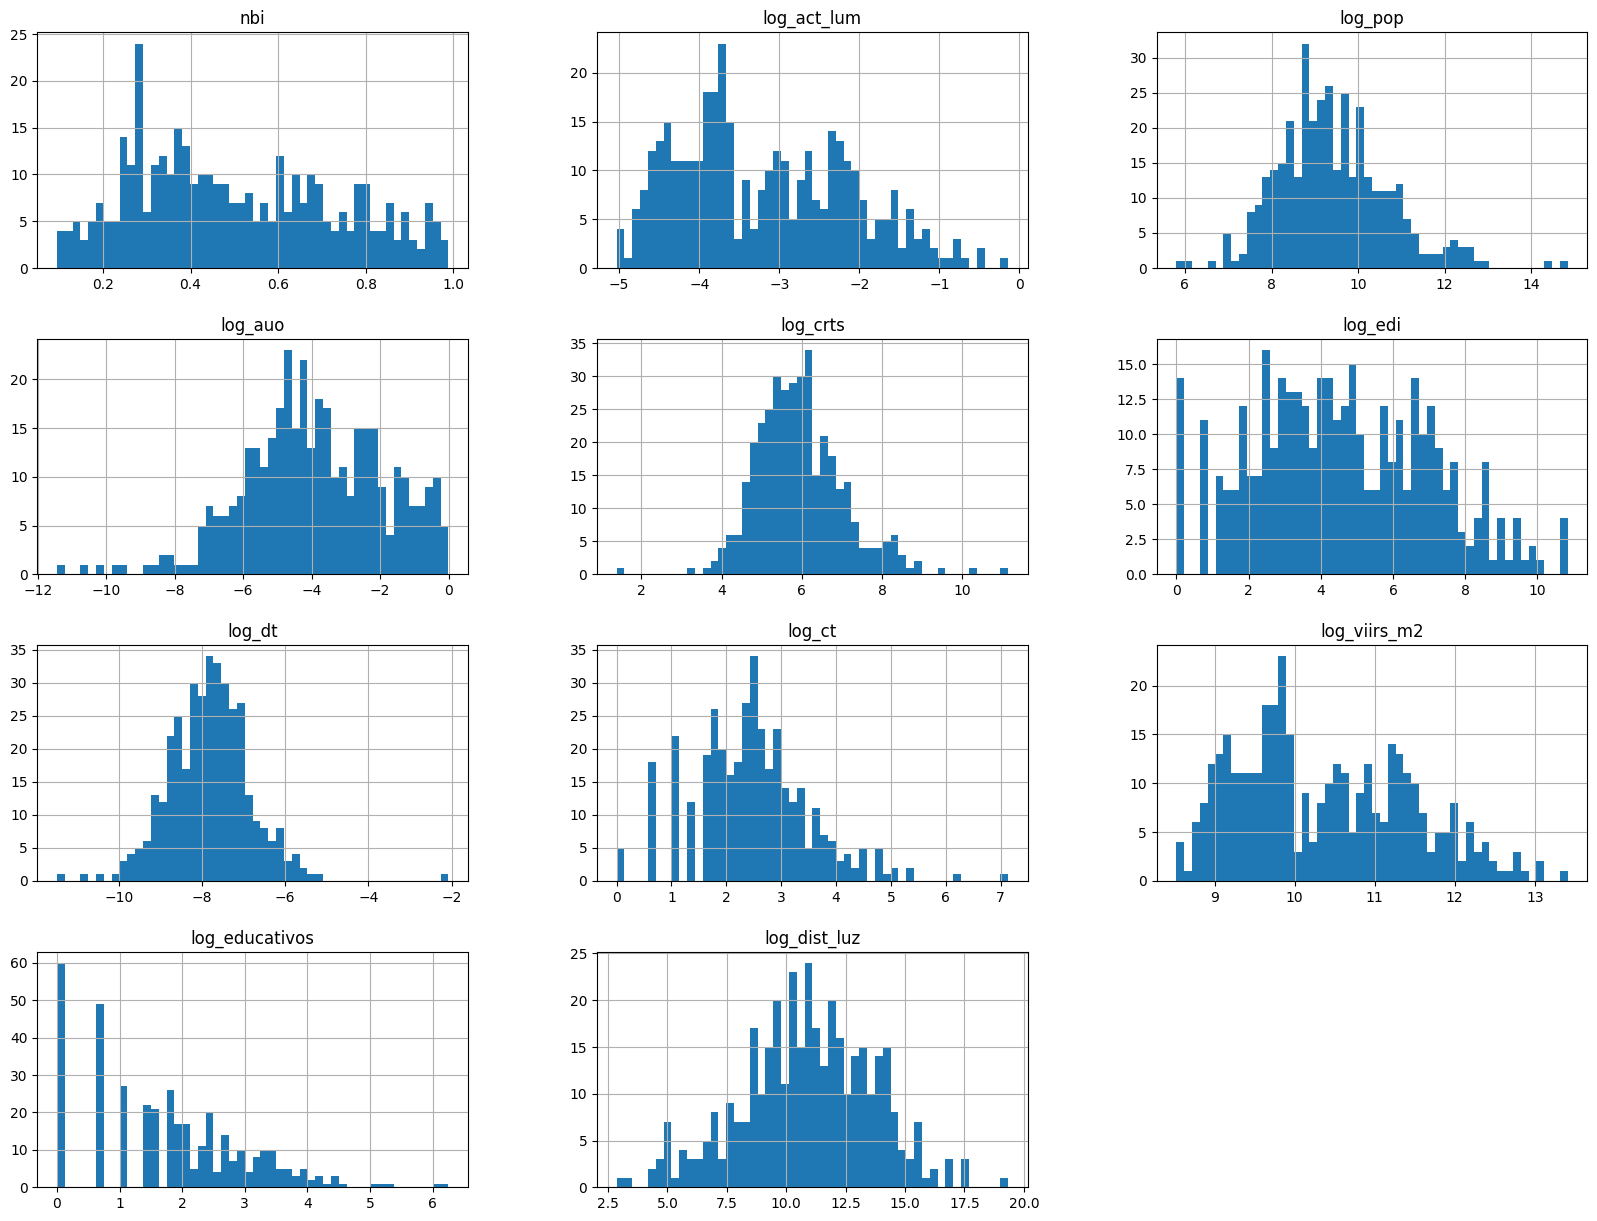

In [9]:
# Histogramas

['nbi', 'act_lum', 'pop', 'area_urb_ocupada', 'carreteras', 'edificaciones', 'densidad', 'numero_componentes', 'densidad_servicios', 'numero_componentes_servicios']

consolidada = consolidada.copy()
consolidada['log_act_lum'] = np.log(consolidada['act_lum'])
consolidada['log_pop'] = np.log(consolidada['pop'])
consolidada['log_auo'] = np.log(consolidada['area_urb_ocupada'])
consolidada['log_crts'] = np.log(consolidada['carreteras'])
consolidada['log_edi'] = np.log(consolidada['edificaciones'])
consolidada['log_dt'] = np.log(consolidada['densidad'])
consolidada['log_ct'] = np.log(consolidada['numero_componentes'])
consolidada['log_educativos'] = np.log(consolidada['educativos'])

# Extras para análisis descriptivo
consolidada['log_viirs_m2'] = np.log(consolidada['viirs_m2'])
consolidada['log_dist_luz'] = np.log(consolidada['dist_luz'])

consolidada[['nbi', 'log_act_lum', 'log_pop', 'log_auo', 'log_crts', 'log_edi', 'log_dt', 'log_ct', 'log_viirs_m2', 'log_educativos', 'log_dist_luz']].hist(bins=50, figsize=(20, 15))
plt.show()

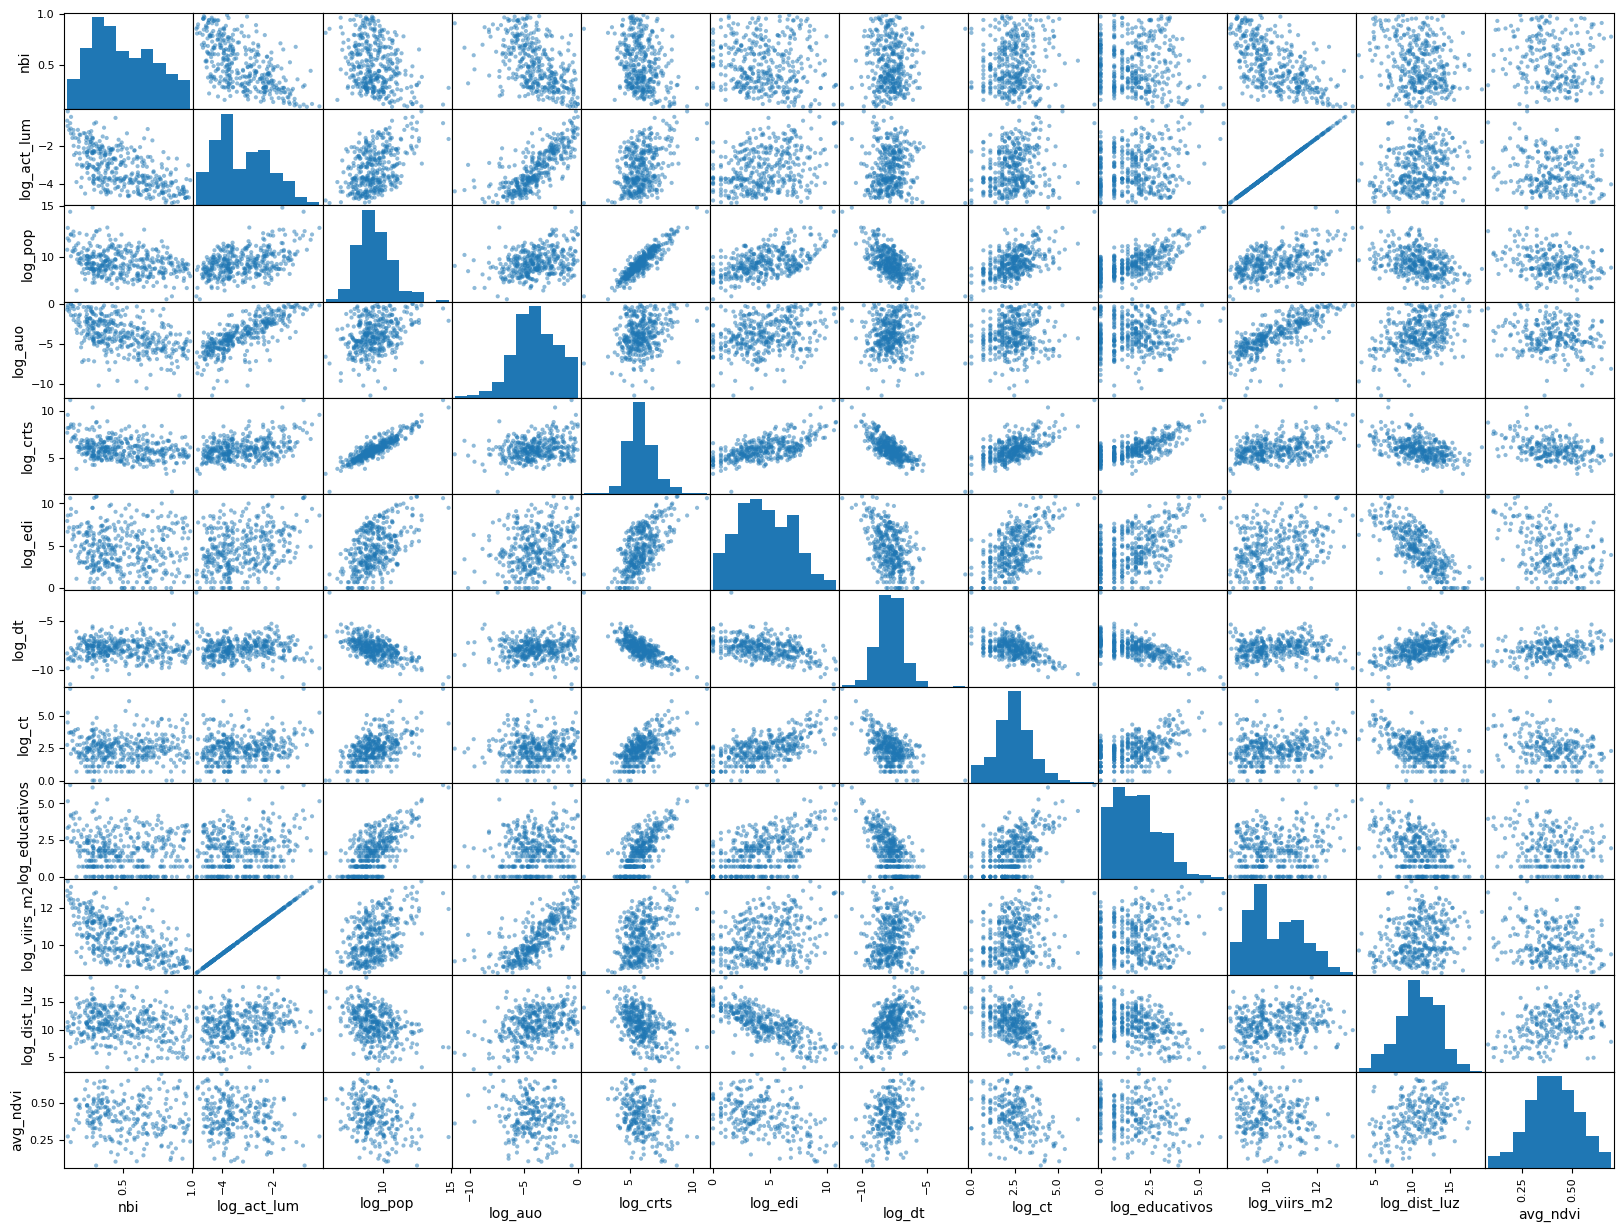

In [10]:
attributes = ['nbi', 'log_act_lum', 'log_pop', 'log_auo', 'log_crts', 'log_edi', 'log_dt', 'log_ct', 'log_educativos', 'log_viirs_m2', 'log_dist_luz', 'avg_ndvi']
scatter_matrix(consolidada[attributes], figsize=(20, 15))
plt.show()

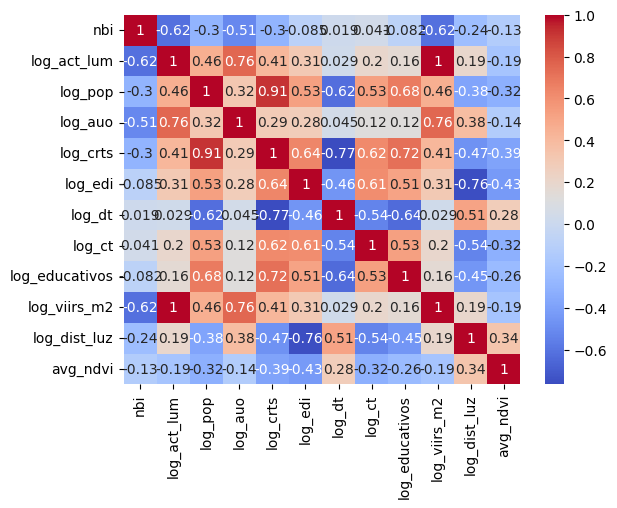

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = consolidada[['nbi', 'log_act_lum', 'log_pop', 'log_auo', 'log_crts', 'log_edi', 'log_dt', 'log_ct', 'log_educativos', 'log_viirs_m2', 'log_dist_luz', 'avg_ndvi']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [12]:
# Preparar agrupadores
# Crear intervalos personalizados
consolidada['act_lum_intervalo'] = pd.qcut(consolidada['act_lum'], q=5, labels=[
    'Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'
])

# Crear intervalos personalizados
consolidada['dist_luz_intervalo'] = pd.qcut(consolidada['dist_luz'], q=5, labels=[
    'Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'
])

# Crear intervalos personalizados
consolidada['auo_intervalo'] = pd.qcut(consolidada['area_urb_ocupada'], q=5, labels=[
    'Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'
])

# Crear intervalos personalizados
consolidada['edificaciones_intervalo'] = pd.qcut(consolidada['edificaciones'], q=5, labels=[
    'Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'
])

# Crear intervalos personalizados
consolidada['dt_intervalo'] = pd.qcut(consolidada['densidad'], q=5, labels=[
    'Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'
])

# Crear intervalos personalizados
consolidada['ct_intervalo'] = pd.qcut(consolidada['numero_componentes'], q=5, labels=[
    'Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'
])


#bins = [0, .1, .3, .7, 1]
#labels = ['Muy Bajo', 'Bajo', 'Alto', 'Muy Alto']

consolidada['acceso_servicios'] = np.where(consolidada['densidad_servicios'] > 0.7, 1, 0)

#consolidada['auo_intervalo'] = pd.cut(consolidada['area_urb_ocupada'], bins=bins, labels=labels, include_lowest=True)
#consolidada['ds_intervalo'] = pd.cut(consolidada['densidad_servicios'], bins=bins, labels=labels, include_lowest=True)
#consolidada['dcs_intervalo'] = pd.cut(consolidada['numero_componentes_servicios'], bins=bins, labels=labels, include_lowest=True)

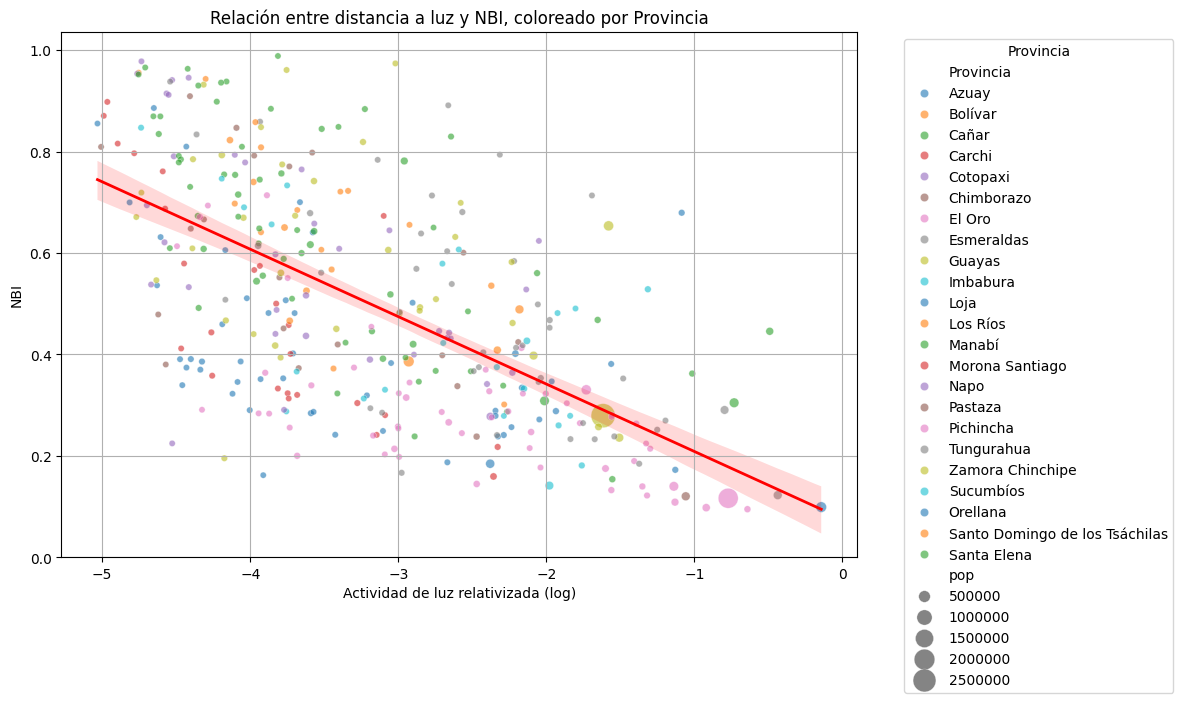

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el scatter plot
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=consolidada,
    x='log_act_lum',
    y='nbi',
    size='pop',
    hue='Provincia',  # Colorea por provincia # urbano - rural sería mejor
    sizes=(20, 300),
    alpha=0.6,
    palette='tab10',  # Puedes cambiar esto por otro colormap como 'Set2', 'Dark2', etc.
    legend=True
)

# Línea de regresión global
sns.regplot(
    data=consolidada,
    x='log_act_lum',
    y='nbi',
    scatter=False,
    color='red',
    line_kws={"linewidth": 2}
)

# Estética
plt.xlabel('Actividad de luz relativizada (log)')
plt.ylabel('NBI')
plt.title('Relación entre distancia a luz y NBI, coloreado por Provincia')
plt.grid(True)
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

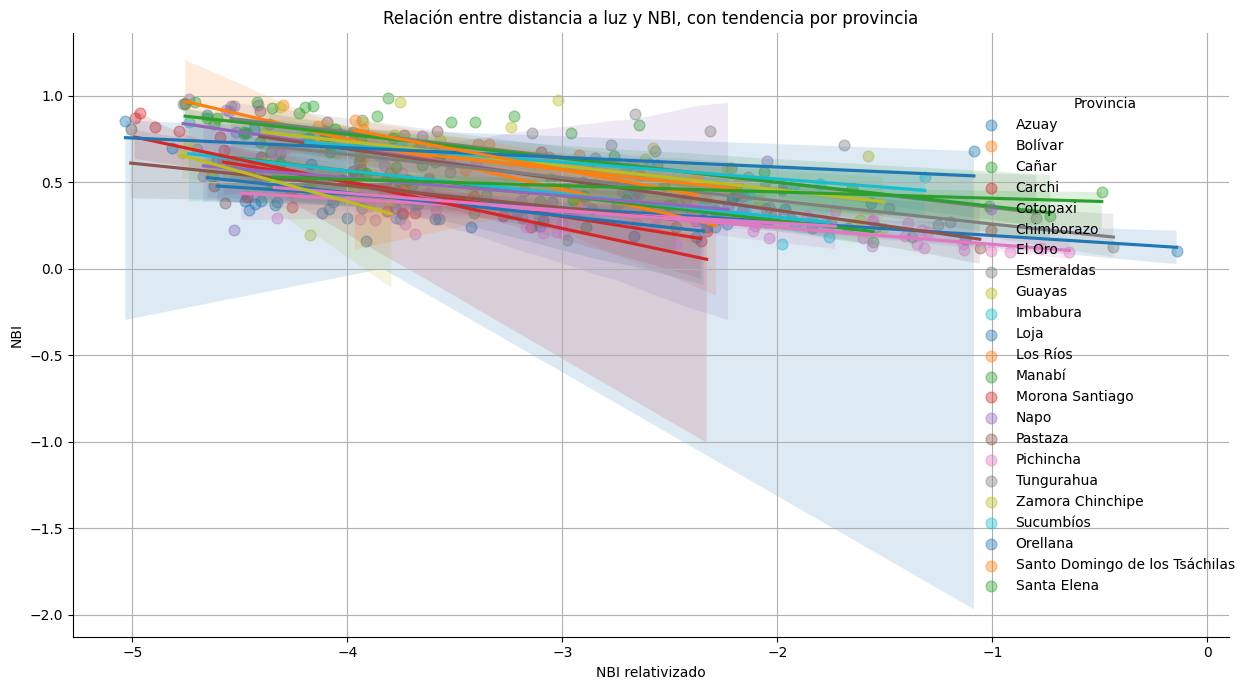

In [14]:
# Usar lmplot para regresiones por grupo (Provincia)
g = sns.lmplot(
    data=consolidada,
    x='log_act_lum',
    y='nbi',
    hue='Provincia',
    #size='pop',
    scatter_kws={'alpha': 0.4, 's': 60},  # Tamaño y transparencia de puntos
    height=7,
    aspect=1.4,
    palette='tab10',
    legend=True
)

# Estética
g.set_axis_labels('NBI relativizado', 'NBI')
plt.title('Relación entre distancia a luz y NBI, con tendencia por provincia')
plt.grid(True)
plt.tight_layout()
plt.show()

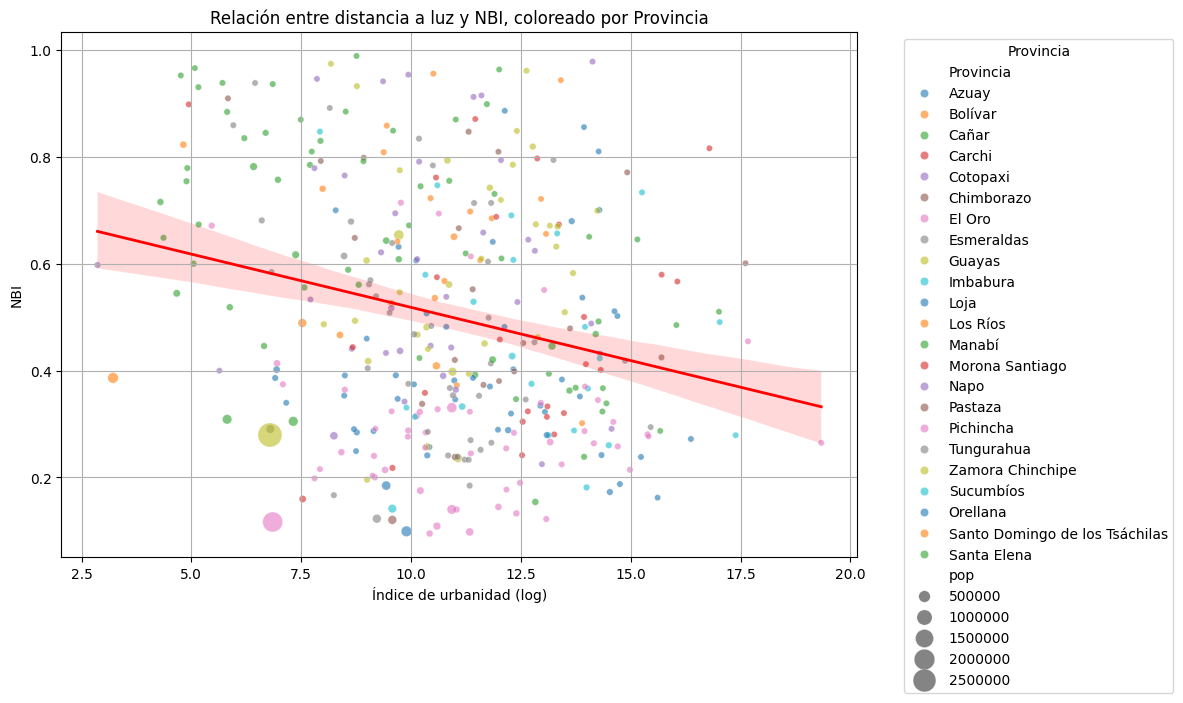

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el scatter plot
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=consolidada,
    x='log_dist_luz',
    y='nbi',
    size='pop',
    hue='Provincia',  # Colorea por provincia
    sizes=(20, 300),
    alpha=0.6,
    palette='tab10',  # Puedes cambiar esto por otro colormap como 'Set2', 'Dark2', etc.
    legend=True
)

# Línea de regresión global
sns.regplot(
    data=consolidada,
    x='log_dist_luz',
    y='nbi',
    scatter=False,
    color='red',
    line_kws={"linewidth": 2}
)

# Estética
plt.xlabel('Índice de urbanidad (log)')
plt.ylabel('NBI')
plt.title('Relación entre distancia a luz y NBI, coloreado por Provincia')
plt.grid(True)
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

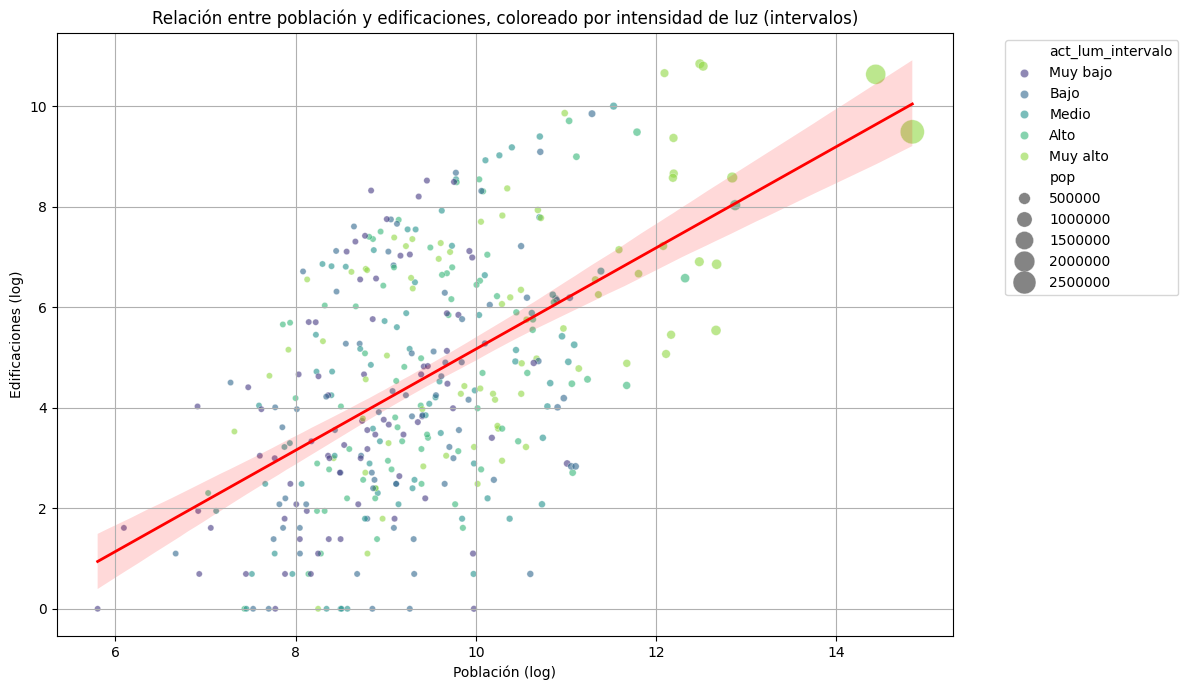

In [16]:
# Crear el scatter plot con colores por intervalos
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=consolidada,
    x='log_pop',
    y='log_edi',
    size='pop',
    hue='act_lum_intervalo',  # Ahora usamos los intervalos
    sizes=(20, 300),
    alpha=0.6,
    palette='viridis',  # Puedes usar: 'Spectral', 'plasma', 'coolwarm', etc.
    legend='brief'
)

# Línea de regresión global
sns.regplot(
    data=consolidada,
    x='log_pop',
    y='log_edi',
    scatter=False,
    color='red',
    line_kws={"linewidth": 2}
)

# Estética
plt.xlabel('Población (log)')
plt.ylabel('Edificaciones (log)')
plt.title('Relación entre población y edificaciones, coloreado por intensidad de luz (intervalos)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

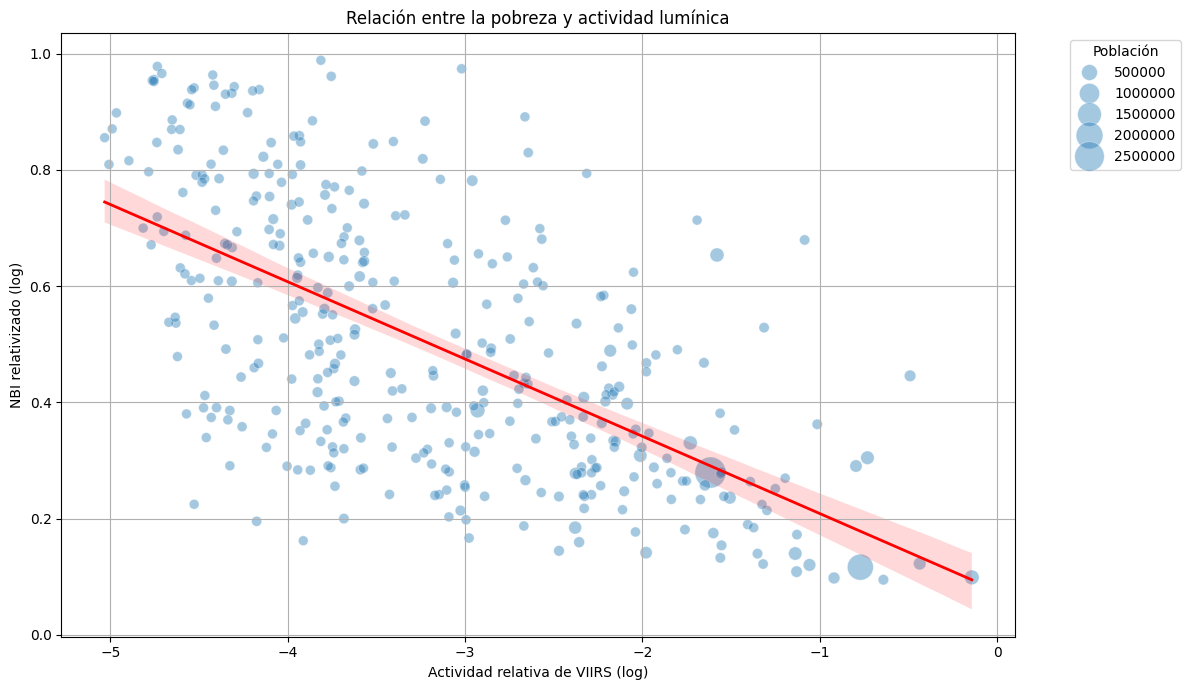

In [17]:
# Crear el scatter plot con colores por intervalos
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=consolidada,
    x='log_act_lum',
    y='nbi',
    size='pop',
    sizes=(50, 500),
    alpha=0.4,
    legend='brief'
)

# Línea de regresión global
sns.regplot(
    data=consolidada,
    x='log_act_lum',
    y='nbi',
    scatter=False,
    color='red',
    line_kws={"linewidth": 2}
)

# Estética
plt.xlabel('Actividad relativa de VIIRS (log)')
plt.ylabel('NBI relativizado (log)')
plt.title('Relación entre la pobreza y actividad lumínica')
plt.grid(True)
plt.legend(title='Población', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

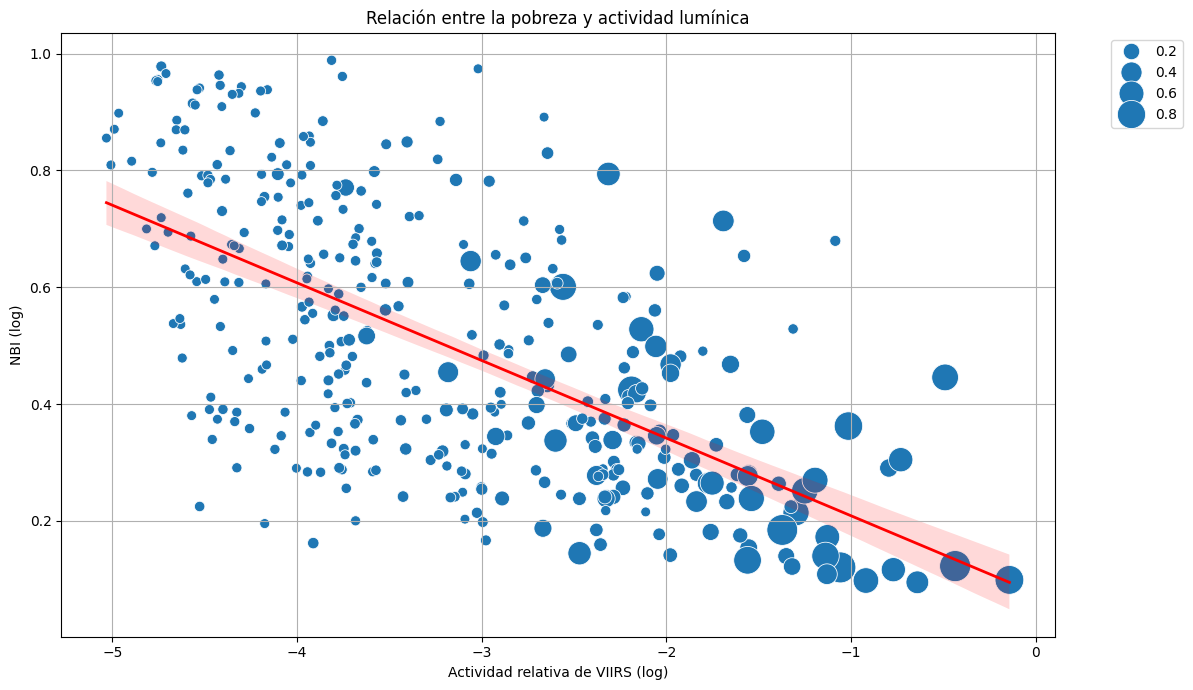

In [18]:
# Crear el scatter plot con colores por intervalos
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=consolidada,
    x='log_act_lum',
    y='nbi',
    size='area_urb_ocupada',
    #hue='viirs_intervalo_rs',  # Ahora usamos los intervalos
    sizes=(50, 500),
    #alpha=0.6,
    #palette='Spectral',  # Puedes usar: 'Spectral', 'plasma', 'coolwarm', etc.
    legend='brief'
)

# Línea de regresión global
sns.regplot(
    data=consolidada,
    x='log_act_lum',
    y='nbi',
    scatter=False,
    color='red',
    line_kws={"linewidth": 2}
)

# Estética
plt.xlabel('Actividad relativa de VIIRS (log)')
plt.ylabel('NBI (log)')
plt.title('Relación entre la pobreza y actividad lumínica')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

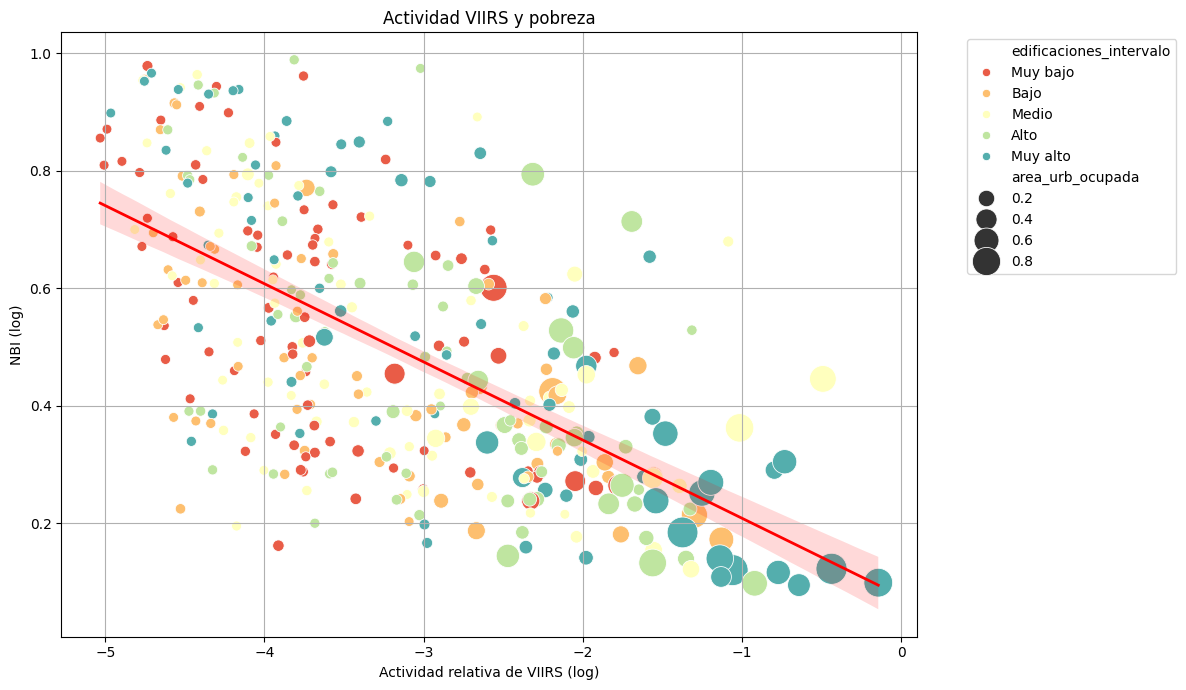

In [19]:
# Crear el scatter plot con colores por intervalos
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=consolidada,
    x='log_act_lum',
    y='nbi',
    size='area_urb_ocupada',
    hue='edificaciones_intervalo',  # Ahora usamos los intervalos
    sizes=(50, 500),
   # alpha=0.6,
    palette='Spectral',  # Puedes usar: 'Spectral', 'plasma', 'coolwarm', etc.
    legend='brief'
)

# Línea de regresión global
sns.regplot(
    data=consolidada,
    x='log_act_lum',
    y='nbi',
    scatter=False,
    color='red',
    line_kws={"linewidth": 2}
)

# Estética
plt.xlabel('Actividad relativa de VIIRS (log)')
plt.ylabel('NBI (log)')
plt.title('Actividad VIIRS y pobreza')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

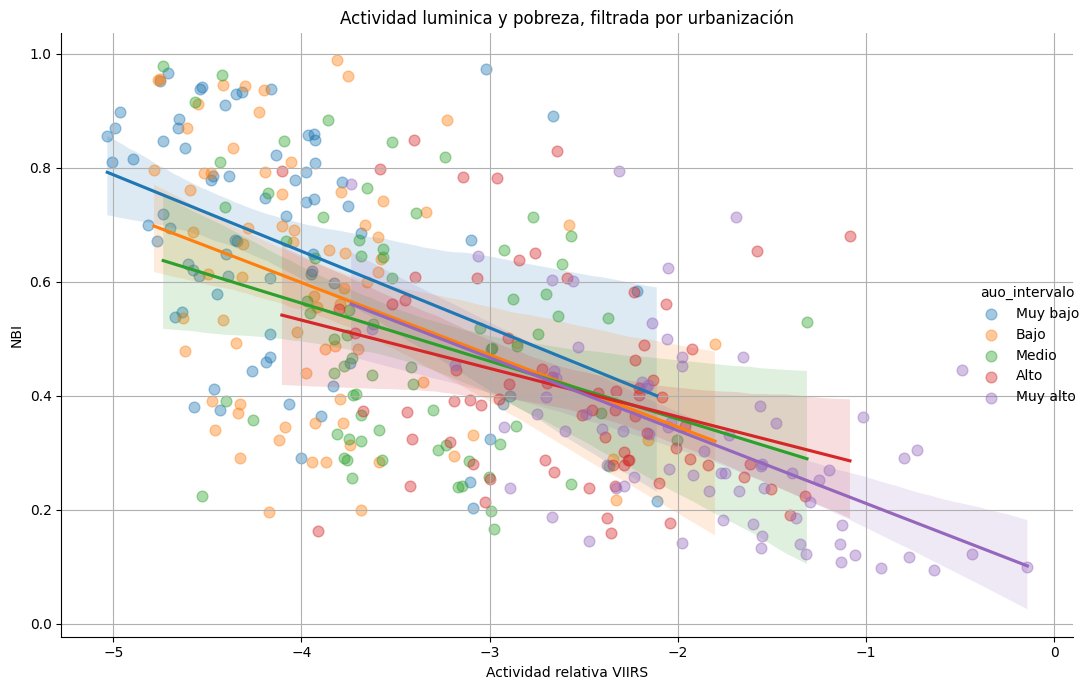

In [20]:
# Usar lmplot para regresiones por grupo (Provincia)
g = sns.lmplot(
    data=consolidada,
    x='log_act_lum',
    y='nbi',
    hue='auo_intervalo',
    scatter_kws={'alpha': 0.4, 's': 60},  # Tamaño y transparencia de puntos
    height=7,
    aspect=1.4,
    palette='tab10',
    legend=True
)

# Estética
g.set_axis_labels('Actividad relativa VIIRS', 'NBI')
plt.title('Actividad luminica y pobreza, filtrada por urbanización')
plt.grid(True)
#plt.legend(title='Área urbana ocupada', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

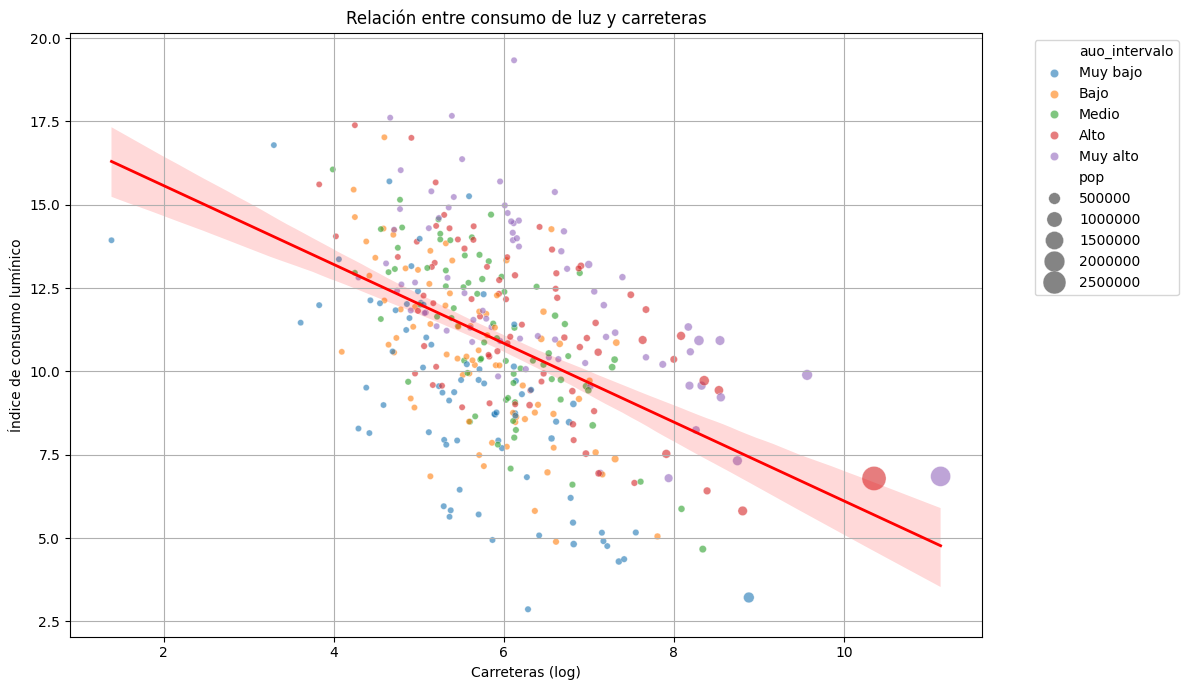

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el scatter plot
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=consolidada,
    x='log_crts',
    y='log_dist_luz',
    size='pop',
    hue='auo_intervalo',  # Colorea por provincia
    sizes=(20, 300),
    alpha=0.6,
    palette='tab10',  # Puedes cambiar esto por otro colormap como 'Set2', 'Dark2', etc.
    legend=True
)

# Línea de regresión global
sns.regplot(
    data=consolidada,
    x='log_crts',
    y='log_dist_luz',
    scatter=False,
    color='red',
    line_kws={"linewidth": 2}
)

# Estética
plt.xlabel('Carreteras (log)')
plt.ylabel('Índice de consumo lumínico')
plt.title('Relación entre consumo de luz y carreteras')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

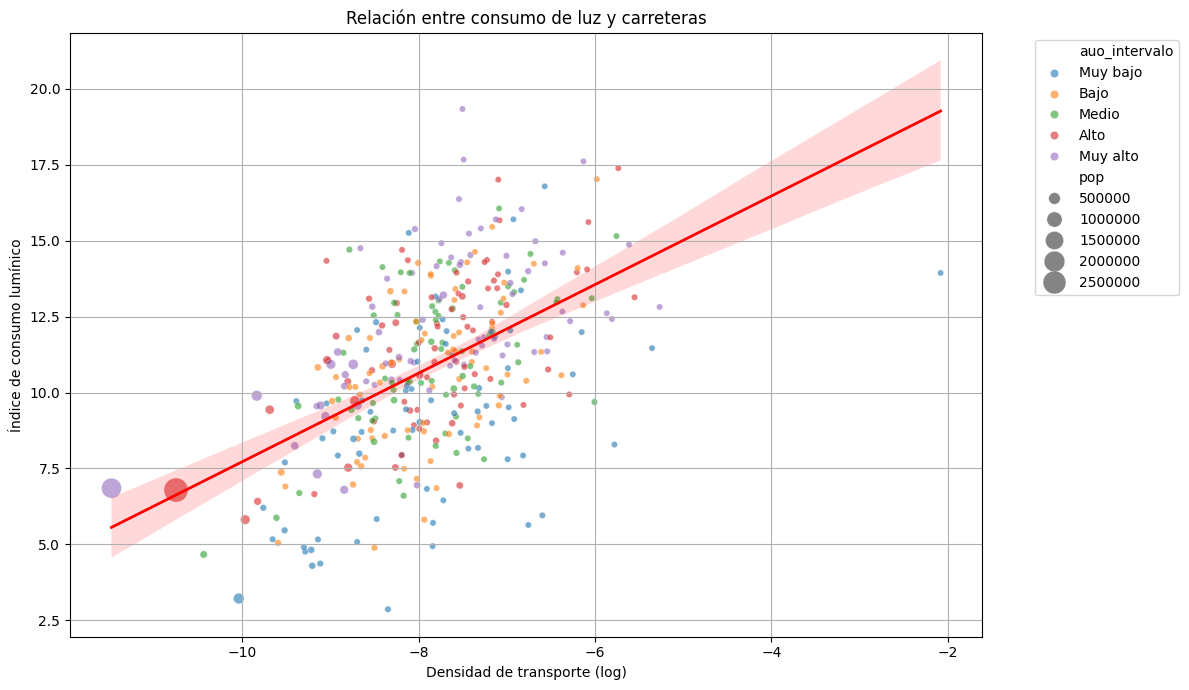

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el scatter plot
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=consolidada,
    x='log_dt',
    y='log_dist_luz',
    size='pop',
    hue='auo_intervalo',  # Colorea por provincia
    sizes=(20, 300),
    alpha=0.6,
    palette='tab10',  # Puedes cambiar esto por otro colormap como 'Set2', 'Dark2', etc.
    legend=True
)

# Línea de regresión global
sns.regplot(
    data=consolidada,
    x='log_dt',
    y='log_dist_luz',
    scatter=False,
    color='red',
    line_kws={"linewidth": 2}
)

# Estética
plt.xlabel('Densidad de transporte (log)')
plt.ylabel('Índice de consumo lumínico')
plt.title('Relación entre consumo de luz y carreteras')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Ajuste de variables

In [23]:
consolidada.columns

Index(['ADM3_PCODE', 'Año', 'avg_rad_max', 'pop', 'm2', 'edificaciones',
       'carreteras', 'densidad', 'numero_componentes', 'densidad_servicios',
       'numero_componentes_servicios', 'num_red_agua', 'educativos',
       'avg_ndvi', 'area', 'dist_luz', 'Provincia', 'Cantón', 'Parroquia',
       'Personas', 'No pobres', 'Pobres', 'nbi', 'area_urb_ocupada',
       'viirs_m2', 'act_lum', 'log_act_lum', 'log_pop', 'log_auo', 'log_crts',
       'log_edi', 'log_dt', 'log_ct', 'log_educativos', 'log_viirs_m2',
       'log_dist_luz', 'act_lum_intervalo', 'dist_luz_intervalo',
       'auo_intervalo', 'edificaciones_intervalo', 'dt_intervalo',
       'ct_intervalo', 'acceso_servicios'],
      dtype='object')

In [24]:
#X_continuas = ['nbi', 'log_pop', 'log_auo', 'log_crts', 'log_edi', 'log_dt', 'log_ct', 'log_viirs_m2']

#dummies = pd.get_dummies(consolidada[['ds_intervalo', 'ds_intervalo']], drop_first=True)
#consolidada = pd.concat([consolidada, dummies], axis=1)

In [28]:
consolidada.columns

Index(['ADM3_PCODE', 'Año', 'avg_rad_max', 'pop', 'm2', 'edificaciones',
       'carreteras', 'densidad', 'numero_componentes', 'densidad_servicios',
       'numero_componentes_servicios', 'num_red_agua', 'educativos',
       'avg_ndvi', 'area', 'dist_luz', 'Provincia', 'Cantón', 'Parroquia',
       'Personas', 'No pobres', 'Pobres', 'nbi', 'area_urb_ocupada',
       'viirs_m2', 'act_lum', 'log_act_lum', 'log_pop', 'log_auo', 'log_crts',
       'log_edi', 'log_dt', 'log_ct', 'log_educativos', 'log_viirs_m2',
       'log_dist_luz', 'act_lum_intervalo', 'dist_luz_intervalo',
       'auo_intervalo', 'edificaciones_intervalo', 'dt_intervalo',
       'ct_intervalo', 'acceso_servicios'],
      dtype='object')

In [26]:
#vars_cat = ['ds_intervalo'] # 'dcs_intervalo'
#consolidada = pd.get_dummies(consolidada, columns=vars_cat, drop_first=True)

In [30]:
dummies = ['acceso_servicios'] # 'dcs_intervalo_Bajo', 'dcs_intervalo_Alto', 'dcs_intervalo_Muy Alto'
continuas = ['nbi', 'log_auo', 'log_pop', 'log_edi', 'log_crts', 'log_act_lum', 'log_dt', 'log_ct', 'log_educativos', 'avg_ndvi', 'log_dist_luz'] # log_crts 

In [31]:
#from sklearn.preprocessing import MinMaxScaler

#df = df.copy()
#continuous_columns = ['log_act_lum', 'log_pop', 'log_auo', 'log_crts', 'log_edi', 'log_dt', 'log_ct', 'log_ds', 'log_cs', 'log_viirs_m2', 'log_dist_luz']

# Uso de escala mínima y máxima
#scaler = MinMaxScaler()
#df[continuous_columns] = scaler.fit_transform(df[continuous_columns])
#df.head()

columnas = continuas + dummies
df = consolidada[columnas]

# Modelo

In [32]:
from sklearn.model_selection import train_test_split

#X = df.drop(['auo_log', 'log_pop', 'viirs_m2_log'], axis=1)
# df = consolidada.dropna(subset=['log_densidad'])
X = df.drop(columns=['nbi'])
X = X.replace({False: 0, True: 1})
X = X.fillna(0)
X = X.drop(columns=['log_auo', 'log_dt', 'acceso_servicios', 'log_edi', 'log_educativos', 'avg_ndvi', 'log_dist_luz'])
y = df['nbi']

# Creamos un conjunto de datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1997)
print(f'El tamaño del conjunto de entranmiento de las regresoras es %s registros.' % X_train.shape[0])
print(f'El tamaño del conjunto de pruebas de las regresoras es %s registros.' % X_test.shape[0])
print(f'El tamaño del conjunto de entranmiento de la variable regresada es %s registros.' % y_train.shape)
print(f'El tamaño del conjunto de entranmiento de la variable regresada es %s registros.' % y_test.shape)

El tamaño del conjunto de entranmiento de las regresoras es 262 registros.
El tamaño del conjunto de pruebas de las regresoras es 113 registros.
El tamaño del conjunto de entranmiento de la variable regresada es 262 registros.
El tamaño del conjunto de entranmiento de la variable regresada es 113 registros.


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = modelo.predict(X_test)

In [36]:
# Error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)

MSE: 0.03318035061636537
R²: 0.3835421673434801


In [37]:
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)

Coeficientes: [ 0.03302936 -0.09105105 -0.13021975  0.07314727]
Intercepto: 0.13775485207910343


# Análisis econométrico

In [38]:
import statsmodels.api as sm 
from stargazer.stargazer import Stargazer

In [44]:
# Solo corre esta línea si aún NO habías generado las dummies
# vars_cat = ['ds_intervalo', 'dcs_intervalo']
# consolidada = pd.get_dummies(consolidada, columns=vars_cat, drop_first=True)

# Ajuste del modelo
est = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()
est.summary()

#stargazer = Stargazer([est])
#stargazer.render_html()
#stargazer.render_latex()
# Ver uso en: https://pypi.org/project/stargazer/

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    nbi   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     76.47
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           3.30e-47
Time:                        18:15:47   Log-Likelihood:                 134.70
No. Observations:                 375   AIC:                            -259.4
Df Residuals:                     370   BIC:                            -239.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1222      0.096      1.277      0.202      -0.066       0.310
log_pop         0.0354      0.017      2.062      0.040       0.002       0.069
log_crts       -0.0906      0.021     -4.326      0.000      -0.132      -0.049
log_act_lum    -0.1269      0.009    -13.636      0.000      -0.145      -0.109
log_ct          0.0724      0.011      6.601      0.000       0.051       0.094
==============================================================================
Omnibus:                        3.385   Durbin-Watson:                   1.302
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                3.467
Skew:                           0.222   Prob(JB):                        0.177
Kurtosis:                       2.844   Cond. No.                         132.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

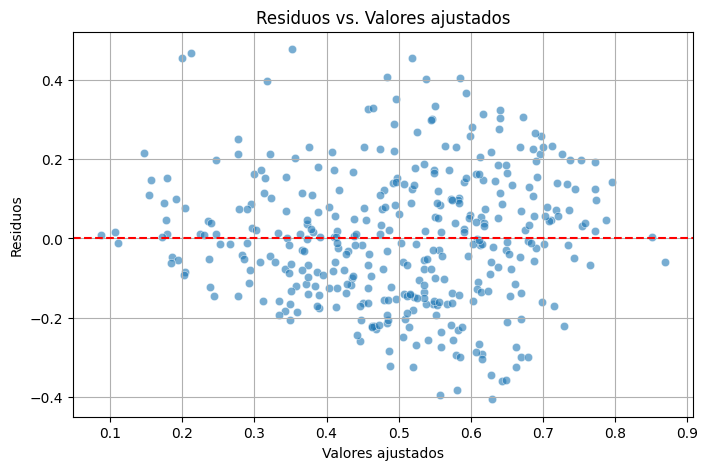

In [45]:
# Suponiendo que ya tienes los residuos y los valores ajustados
residuos = est.resid
valores_ajustados = est.fittedvalues

plt.figure(figsize=(8, 5))
sns.scatterplot(x=valores_ajustados, y=residuos, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs. Valores ajustados')
plt.grid(True)
plt.show()

In [46]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Suponiendo que ya tienes el modelo ajustado
residuos = est.resid
exog = est.model.exog  # Variables independientes

# Realizar la prueba
bp_test = het_breuschpagan(residuos, exog)

# Resultados
labels = ['Estadístico LM', 'p-valor', 'Estadístico F', 'p-valor F']
print(dict(zip(labels, bp_test)))

{'Estadístico LM': np.float64(11.601924850621822), 'p-valor': np.float64(0.020570478984352096), 'Estadístico F': np.float64(2.9531748296723355), 'p-valor F': np.float64(0.02007259724635075)}


In [47]:
from statsmodels.stats.diagnostic import het_white

white_test = het_white(residuos, exog)
print(dict(zip(['Estadístico LM', 'p-valor', 'Estadístico F', 'p-valor F'], white_test)))

{'Estadístico LM': np.float64(23.207671560011356), 'p-valor': np.float64(0.05697331307843164), 'Estadístico F': np.float64(1.6963664327297454), 'p-valor F': np.float64(0.05438325887845554)}


In [48]:
df.columns

Index(['nbi', 'log_auo', 'log_pop', 'log_edi', 'log_crts', 'log_act_lum',
       'log_dt', 'log_ct', 'log_educativos', 'avg_ndvi', 'log_dist_luz',
       'acceso_servicios'],
      dtype='object')

In [49]:
# Ajustar el modelo OLS
est = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()

# Estimación de errores estándar robustos
est_robust = est.get_robustcov_results(cov_type='HC3')  # HC3 es una opción robusta que corrige heterocedasticidad

# Mostrar resultados con errores estándar robustos
est_robust.summary()

# Si quieres usar Stargazer para mostrar los resultados en formato HTML o LaTeX
#stargazer = Stargazer([est_robust])
#stargazer.render_html()  # Para generar HTML
#stargazer.render_latex()  # Para generar LaTeX si lo prefieres

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    nbi   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     99.60
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           1.86e-57
Time:                        18:15:55   Log-Likelihood:                 134.70
No. Observations:                 375   AIC:                            -259.4
Df Residuals:                     370   BIC:                            -239.8
Df Model:                           4                                         
Covariance Type:                  HC3                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1222      0.091      1.346      0.179      -0.056       0.301
log_pop         0.0354      0.017      2.034      0.043       0.001       0.070
log_crts       -0.0906      0.020     -4.431      0.000      -0.131      -0.050
log_act_lum    -0.1269      0.009    -14.699      0.000      -0.144      -0.110
log_ct          0.0724      0.011      6.888      0.000       0.052       0.093
==============================================================================
Omnibus:                        3.385   Durbin-Watson:                   1.302
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                3.467
Skew:                           0.222   Prob(JB):                        0.177
Kurtosis:                       2.844   Cond. No.                         132.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [50]:
consolidada.to_excel('C:/Users/Michael/Documents/ml_zc/datosObtenidos/results_más.xlsx', index_label=False)

In [51]:
from sklearn.ensemble import RandomForestRegressor

# Creamos un conjunto de datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1997)
print(f'El tamaño del conjunto de entranmiento de las regresoras es %s registros.' % X_train.shape[0])
print(f'El tamaño del conjunto de pruebas de las regresoras es %s registros.' % X_test.shape[0])
print(f'El tamaño del conjunto de entranmiento de la variable regresada es %s registros.' % y_train.shape)
print(f'El tamaño del conjunto de entranmiento de la variable regresada es %s registros.' % y_test.shape)

# Crear el modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

El tamaño del conjunto de entranmiento de las regresoras es 300 registros.
El tamaño del conjunto de pruebas de las regresoras es 75 registros.
El tamaño del conjunto de entranmiento de la variable regresada es 300 registros.
El tamaño del conjunto de entranmiento de la variable regresada es 75 registros.
Mean Squared Error: 0.04
R² Score: 0.30


In [52]:
import xgboost as xgb
from sklearn.datasets import fetch_california_housing


# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir a DMatrix (formato optimizado para XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Parámetros de XGBoost
params = {
    'objective': 'reg:squarederror',  # Regresión con error cuadrático
    'eval_metric': 'rmse',            # Error cuadrático medio
    'max_depth': 6,                   # Profundidad máxima del árbol
    'learning_rate': 0.1,             # Tasa de aprendizaje
    'n_estimators': 100               # Número de árboles
}

# Entrenamiento del modelo
model = xgb.train(params, dtrain, num_boost_round=100)

# Predicciones
y_pred = model.predict(dtest)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.05
R² Score: 0.22


C:\Users\Michael\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [18:15:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


# Clustering

In [53]:
import gower

In [54]:
df2 = df.dropna() #.drop(columns=['nbi'])

In [56]:
# Creamos una matriz cruzada con las distancias
distance_matrix = gower.gower_matrix(df2)
pd.DataFrame(distance_matrix) 

,0,1,2,3,4,5,6,7,8,9,...,239,240,241,242,243,244,245,246,247,248
0,0.000000,0.312324,0.476921,0.362775,0.432802,0.272917,0.454449,0.308790,0.278433,0.324396,...,0.525855,0.330464,0.516242,0.508555,0.447859,0.514053,0.505757,0.544430,0.519428,0.315508
1,0.312324,0.000000,0.186687,0.187901,0.162247,0.117243,0.201555,0.121653,0.170114,0.051392,...,0.258889,0.147534,0.218064,0.196231,0.142440,0.229714,0.225735,0.249003,0.221250,0.167672
2,0.476921,0.186687,0.000000,0.161763,0.167062,0.204004,0.100872,0.183455,0.222590,0.161892,...,0.139246,0.204569,0.145914,0.210627,0.144633,0.085764,0.069877,0.081271,0.117349,0.222108
3,0.362775,0.187901,0.161763,0.000000,0.248689,0.125643,0.150352,0.159474,0.088327,0.173348,...,0.211783,0.191322,0.239945,0.282597,0.238953,0.173891,0.212760,0.210059,0.240428,0.223591
4,0.432802,0.162247,0.167062,0.248689,0.000000,0.203114,0.193341,0.166159,0.273263,0.147186,...,0.204482,0.257837,0.149345,0.156236,0.070177,0.232555,0.203823,0.213194,0.116285,0.289776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,0.514053,0.229714,0.085764,0.173891,0.232555,0.241136,0.103044,0.218274,0.235620,0.205390,...,0.164069,0.201977,0.175434,0.213678,0.199349,0.000000,0.080871,0.063569,0.128715,0.203258
245,0.505757,0.225735,0.069877,0.212760,0.203823,0.238844,0.089445,0.222370,0.246684,0.202367,...,0.162952,0.216688,0.152413,0.212501,0.170617,0.080871,0.000000,0.065953,0.109535,0.219019
246,0.544430,0.249003,0.081271,0.210059,0.213194,0.271513,0.089980,0.238140,0.271324,0.229401,...,0.136902,0.220985,0.153545,0.196693,0.179988,0.063569,0.065953,0.000000,0.106244,0.246950
247,0.519428,0.221250,0.117349,0.240428,0.116285,0.246512,0.118590,0.213139,0.287606,0.204400,...,0.143797,0.204336,0.081326,0.112292,0.094418,0.128715,0.109535,0.106244,0.000000,0.243806


In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Instancia de escalador estándar
scaler = StandardScaler()

# Ajustar y transformar datos
df_scaled = scaler.fit_transform(distance_matrix)

In [58]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors


def cluster(model, X_scaled, method):
    # Seed
    np.random.seed(35735)

    # Estimación
    model.fit(X_scaled)

    # Numero de clusters
    clusters = model.labels_
    num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # No contar ruido (-1)

    # Resultados
    print(f'\nModel Report\n{method}\n')
    print(f'Number of clusters: {num_clusters}\n')

    if num_clusters >= 2:
        silh_score = silhouette_score(X_scaled, clusters)
        print(f'Silhouette Coefficient: {silh_score:.3f}')
    else:
        print('Silhouette Coefficient: No se puede calcular (solo 1 cluster o solo ruido).')
    
    return clusters

In [59]:
# Simulamos un dataset de ejemplo si no tienes tus datos cargados
from sklearn.datasets import make_moons

X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Escalamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

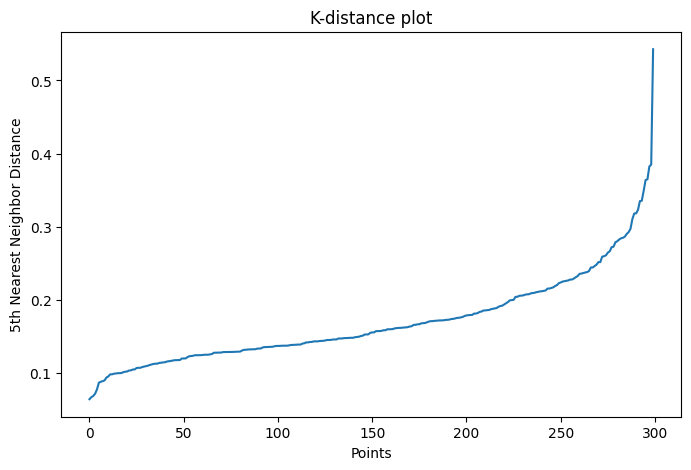

In [60]:
# Graficar k-distance para eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 4])  # 4 porque min_samples=5 normalmente

plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title('K-distance plot')
plt.xlabel('Points')
plt.ylabel('5th Nearest Neighbor Distance')
plt.show()


In [61]:
# Definir DBSCAN
dbscan_model = DBSCAN(eps=0.3, min_samples=5)  # Ajusta eps según tu caso

# Aplicar tu función
labels = cluster(dbscan_model, X_scaled, method='DBSCAN')


Model Report
DBSCAN

Number of clusters: 2

Silhouette Coefficient: 0.250


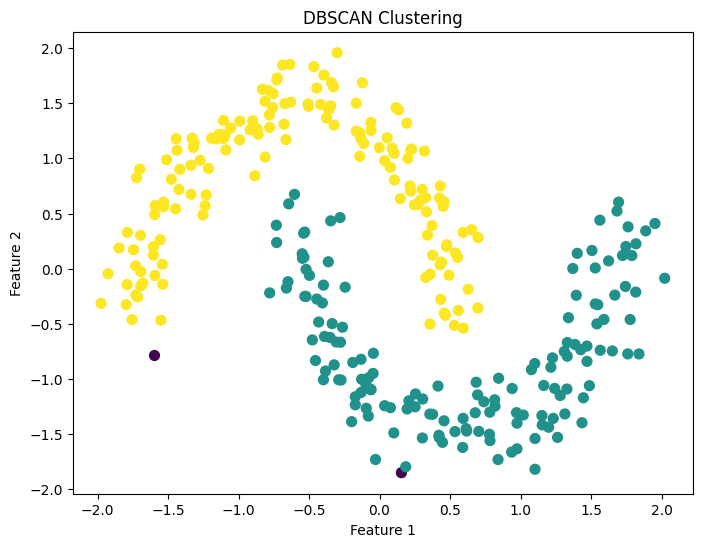

In [62]:
# Graficar los clusters
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [63]:
df2['cluster'] = labels.copy()

ValueError: Length of values (300) does not match length of index (249)

In [ ]:
df2

In [64]:
df

,nbi,log_auo,log_pop,log_edi,log_crts,log_act_lum,log_dt,log_ct,log_educativos,avg_ndvi,log_dist_luz,acceso_servicios
0,0.099034,-0.178738,12.844140,8.579041,9.566265,-0.142902,-9.835495,5.283204,5.153292,0.276570,9.895193,0
1,0.284258,-4.663820,10.035042,5.843544,6.364751,-3.590246,-8.542114,3.970292,1.945910,0.494996,8.765098,0
4,0.322550,-4.717017,8.116417,2.079442,4.990433,-4.119741,-7.594204,1.098612,0.000000,0.465710,13.046070,0
6,0.271838,-0.969947,8.964184,1.791759,5.509388,-2.047341,-7.542220,3.931826,1.098612,0.443227,16.368746,0
7,0.631502,-7.592548,8.882808,3.465736,6.142037,-4.605513,-9.387547,3.091042,0.000000,0.481069,9.715455,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1034,0.393920,-3.500293,9.023529,2.944439,5.802118,-2.950870,-7.853190,1.386294,1.945910,NaN,13.137346,0
1035,0.445716,-0.344397,11.674015,4.882802,6.997596,-0.491020,-7.719448,3.912023,1.791759,NaN,13.208278,0
1036,0.362389,-0.202080,10.507749,4.882802,6.675823,-1.014411,-6.960470,1.791759,2.079442,NaN,13.604029,0
1038,0.468140,-1.315432,10.555448,3.218876,6.706862,-1.653170,-7.532978,2.995732,1.098612,NaN,14.202640,0


In [69]:
t = df.dropna()

# Definir variables dependiente e independientes
X = t[['avg_ndvi', 'log_pop', 'log_crts', 'log_dist_luz']]  # Variables con correlaciones fuertes
y = t['log_act_lum'].dropna()

# Añadir una constante (intercepto) al modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Resumen del modelo (coeficientes, p-valores, R², etc.)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            log_act_lum   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     51.53
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           2.04e-31
Time:                        18:17:09   Log-Likelihood:                -262.05
No. Observations:                 249   AIC:                             534.1
Df Residuals:                     244   BIC:                             551.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -9.2176      0.499    -18.463   